In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

with open("./data/text1.txt", 'r') as f:
    text = [line.lower().strip()[:-1].split() for line in f]
    
print(text)

[['the', 'dog', 'run'], ['a', 'cat', 'run'], ['a', 'dog', 'sleep'], ['the', 'cat', 'sleep'], ['a', 'dog', 'bark'], ['the', 'cat', 'meows'], ['the', 'bird', 'fly'], ['a', 'bird', 'sleep']]


In [3]:
def build_word_vector(text):
    word2id = {w: i for i, w in enumerate(sorted(list(set(reduce(lambda a, b: a + b, text)))))}
    id2word = {x[1]: x[0] for x in word2id.items()}
    wvectors = np.zeros((len(word2id), len(word2id)))
    for sentence in text:
        for word1, word2 in zip(sentence[:-1], sentence[1:]):
            id1, id2 = word2id[word1], word2id[word2]
            wvectors[id1, id2] += 1
            wvectors[id2, id1] += 1
    return wvectors, word2id, id2word

wvectors, word2id, id2word = build_word_vector(text)

print(word2id)
print(id2word)
print(wvectors)
print(wvectors[word2id["dog"]])
print(wvectors[word2id["cat"]])

{'a': 0, 'bark': 1, 'bird': 2, 'cat': 3, 'dog': 4, 'fly': 5, 'meows': 6, 'run': 7, 'sleep': 8, 'the': 9}
{0: 'a', 1: 'bark', 2: 'bird', 3: 'cat', 4: 'dog', 5: 'fly', 6: 'meows', 7: 'run', 8: 'sleep', 9: 'the'}
[[0. 0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 2.]
 [2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 2. 1. 0. 0. 0. 0. 0.]]
[2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 2.]


In [4]:
def euclidean_dis(v1, v2):
    return np.sqrt(np.sum(np.power(np.subtract(v1, v2), 2)))

print(euclidean_dis(wvectors[word2id["dog"]], wvectors[word2id["run"]]))
print(euclidean_dis(wvectors[word2id["dog"]], wvectors[word2id["fly"]]))

3.1622776601683795
3.0


In [5]:
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.sqrt(np.sum(np.power(v1, 2))) * np.sqrt(np.sum(np.power(v1, 2))))

print(wvectors[word2id["dog"]])
print(wvectors[word2id["cat"]])
print(cosine_sim(wvectors[word2id["dog"]], wvectors[word2id["cat"]]))
print(cosine_sim(wvectors[word2id["dog"]], wvectors[word2id["bird"]]))

[2. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 1. 1. 1. 2.]
0.7499999999999999
0.4999999999999999


In [6]:
def normalizing(wvectors):
    linfnorm = np.linalg.norm(wvectors, axis=1, ord=np.inf) # inf = max(sum(abs(x), axis=1))
    return wvectors.astype(np.float) / linfnorm[:,None]

wvectors_n = normalizing(wvectors)

# Euclidean distance
print("###Euclidean distance###")
print(euclidean_dis(wvectors_n[word2id["dog"]], wvectors_n[word2id["run"]]))
print(euclidean_dis(wvectors_n[word2id["dog"]], wvectors_n[word2id["fly"]]))

# Cosine similarity
print("###Cosine similarity###")
print(cosine_sim(wvectors_n[word2id["dog"]], wvectors[word2id["cat"]]))
print(cosine_sim(wvectors_n[word2id["dog"]], wvectors[word2id["bird"]]))

###Euclidean distance###
2.0
1.7320508075688772
###Cosine similarity###
1.4999999999999998
0.9999999999999998


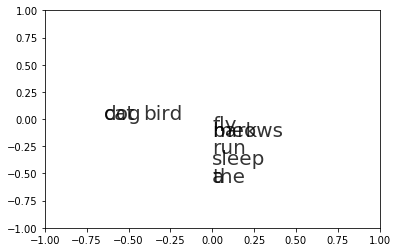

In [8]:
def visualize(wvectors, id2word):
    np.random.seed(10)
    fig = plt.figure()
    U, sigma, Vh = np.linalg.svd(wvectors)
    ax = fig.add_subplot(111)
    ax.axis([-1, 1, -1, 1])
    for i in id2word:
        ax.text(U[i, 0], U[i, 1], id2word[i], alpha=0.8, fontsize=20)
    plt.show()
    
visualize(wvectors, id2word)

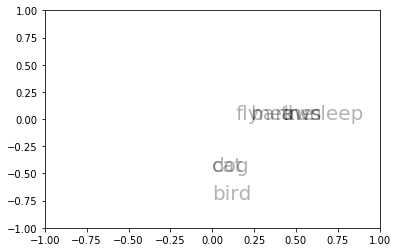

In [7]:
visualize(wvectors_n, id2word)